# Problem Statement

A Company wants to automate the loan eligibility process based on customer details provided while filling online application
form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and
co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirement is as follow:

* Check eligibility of the Customer given the inputs described above. y n

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the dataset
loan=pd.read_csv("C:\\Users\\Gitanjali\\Desktop\\Shital\\training_set.csv")

preview of dataset

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
loan.shape

(614, 13)

In [6]:
loan.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
72,LP001248,Male,No,0,Graduate,No,3500.0,0.0,81.0,300.0,1.0,Semiurban,Y


In [7]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [10]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
# To check missing values in the given dataset
loan.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Preprocessing

Treating credit history as catgorical variable

In [13]:
loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
loan['Credit_History']=loan['Credit_History'].fillna(1.0)

In [15]:
def replacer(df):
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)

    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [16]:
replacer(loan)

In [17]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116625,0.565552,-0.045147,-0.018475
CoapplicantIncome,-0.116625,1.000000,0.187884,-0.059710,0.011084
LoanAmount,0.565552,0.187884,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045147,-0.059710,0.038801,1.000000,0.000432
Credit_History,-0.018475,0.011084,-0.001431,0.000432,1.000000


In [19]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y


In [20]:
dep = []
for i in loan.Dependents:
    dep.append(int(i.replace("3+","3")))
loan.Dependents=dep

In [21]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
# Devide the data into continuous and categorical variables
cat=[]
con=[]
for i in loan.columns:
    if (loan[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [23]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [24]:
con

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Exploratory Data Analysis (EDA) 

 Profiling

In [25]:
loan.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5405.540850,1620.888940,146.412162,342.000000,0.855049
std,1.009623,6108.923986,2926.235009,84.037468,64.372489,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


# Univariate Analysis (Categorical Variables)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

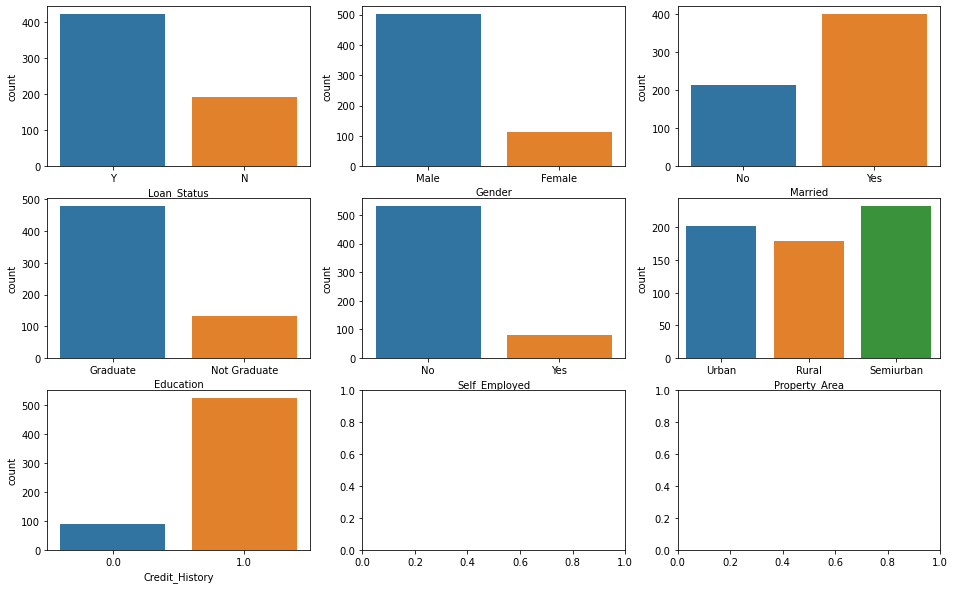

In [27]:
fig,ax = plt.subplots(3,3, figsize=(16,10)) 
sns.countplot('Loan_Status',data=loan,ax=ax[0,0])
sns.countplot('Gender',data=loan,ax=ax[0,1])
sns.countplot('Married',data=loan,ax=ax[0,2])
sns.countplot('Education',data=loan,ax=ax[1,0])
sns.countplot('Self_Employed',data=loan,ax=ax[1,1])
sns.countplot('Property_Area',data=loan,ax=ax[1,2])
sns.countplot('Credit_History',data=loan,ax=ax[2,0])

* Observations

1) More Loans are approved

2) Count of Male applicants is more than Female

3) Count of Married applicant is more than Non-married

4) Count of graduate is more than non-Graduate

5) Count of self-employed is less than that of Non-Self-employed

6) Maximum properties are located in Semiurban areas

7) Credit History is present for many applicants

# Univariate Analysis (Continuous Variables)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

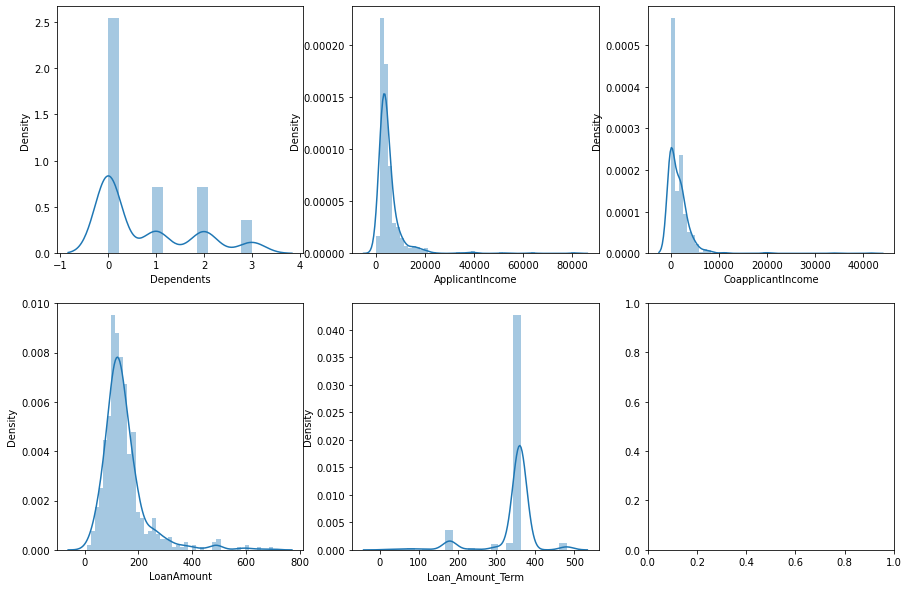

In [28]:
fig,ax = plt.subplots(2,3, figsize=(15,10))
sns.distplot(loan['Dependents'], ax = ax[0,0])
sns.distplot(loan['ApplicantIncome'], ax = ax[0,1])
sns.distplot(loan['CoapplicantIncome'], ax = ax[0,2])
sns.distplot(loan['LoanAmount'], ax = ax[1,0])
sns.distplot(loan['Loan_Amount_Term'], ax = ax[1,1])

* Observation

1) The applicants with number of dependents=0 is maximum

2) Most of the applicants income is in between 0-20000

3) Most of the coapplicants income is in between 0-10000

4) Maximum applicants apply for Loan Amount in between 0-300 thousand

5) Maximum applicants apply for loan amount term of 300-400 months 

# Bivariate Analysis

# Bivariate(Continuous Vs Continuous)

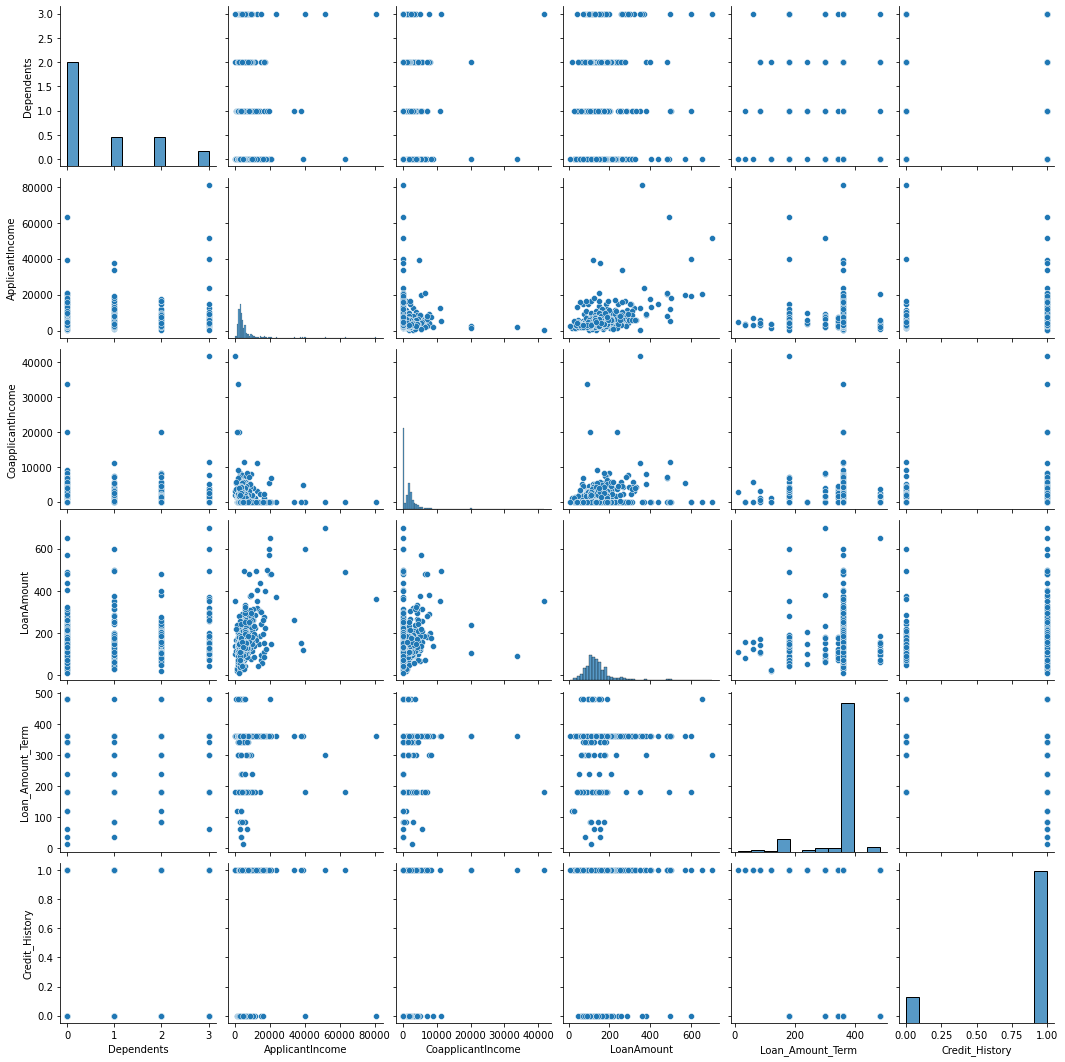

In [29]:
sns.pairplot(loan)

# Bivariate(Categorical Vs Continuous)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

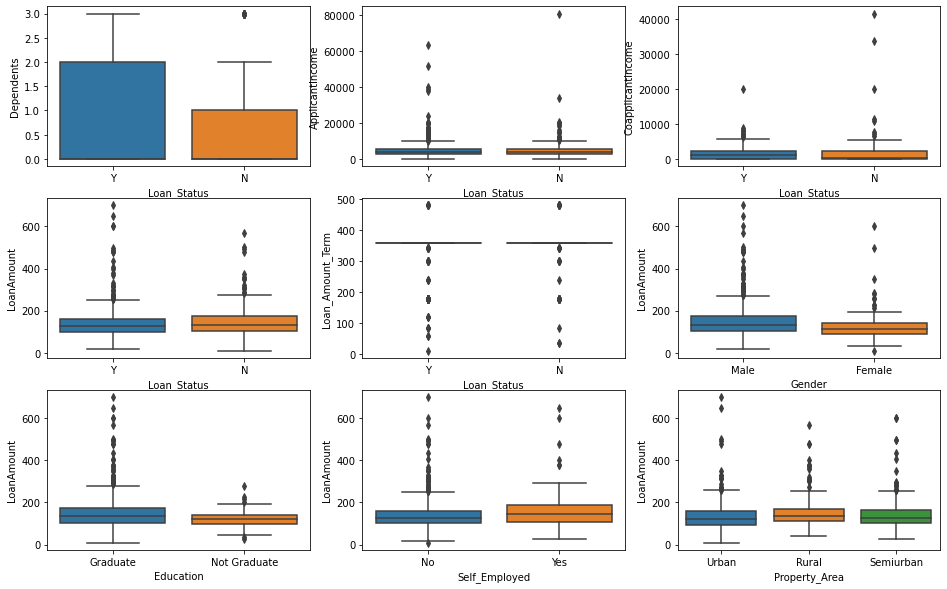

In [30]:
fig,ax = plt.subplots(3,3, figsize=(16,10)) # 'ax' has references to all the four axes
sns.boxplot(loan['Loan_Status'], loan['Dependents'], ax = ax[0,0])
sns.boxplot(loan['Loan_Status'], loan['ApplicantIncome'], ax = ax[0,1])
sns.boxplot(loan['Loan_Status'], loan['CoapplicantIncome'], ax = ax[0,2])
sns.boxplot(loan['Loan_Status'], loan['LoanAmount'], ax = ax[1,0])
sns.boxplot(loan['Loan_Status'], loan['Loan_Amount_Term'], ax = ax[1,1])
sns.boxplot(loan['Gender'], loan['LoanAmount'], ax = ax[1,2])
sns.boxplot(loan['Education'], loan['LoanAmount'],ax=ax[2,0])
sns.boxplot(loan['Self_Employed'], loan['LoanAmount'],ax=ax[2,1])
sns.boxplot(loan['Property_Area'], loan[ 'LoanAmount'],ax=ax[2,2])

* Observation

1) Mean value of Dependents of Y (approved loan) is higher than N (rejected loan)

2) Mean value of ApplicantIncome of approved and rejected applicants are almost the same

3) Mean value of Co- ApplicantIncome of Y (approved) is slightly more than N (rejected)

4) Mean value of Loan Amount of approved and rejected applications are almost same

5) Mean value of Loan_Amount_Term of approved and rejected applications are almost the same

6) The mean value of Loan Amount applied by males is slightly higher than Females

7) The mean value of Loan Amount of Graduated applicants is greater than Not Graduated

8) The mean value of Loan Amount of Self _Employed people is slightly greater

9) The mean value of Loan Amount for all Property_Areas are near abount same

Some of the other baxplots

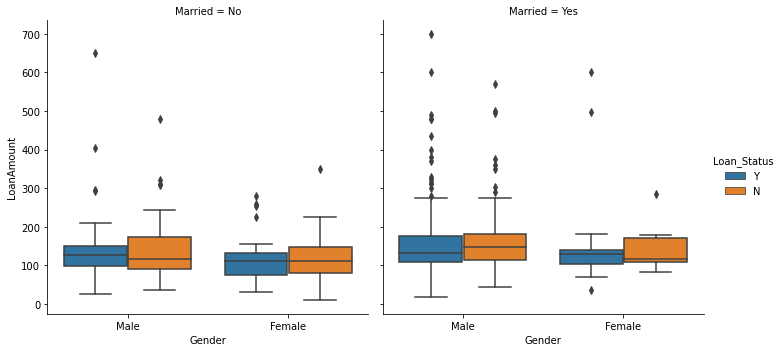

In [31]:
sns.catplot(x="Gender",y="LoanAmount",data=loan,kind="box",hue="Loan_Status",col="Married")

* Observation:- If you are married then the loan amount requested is slightly higher than non-married

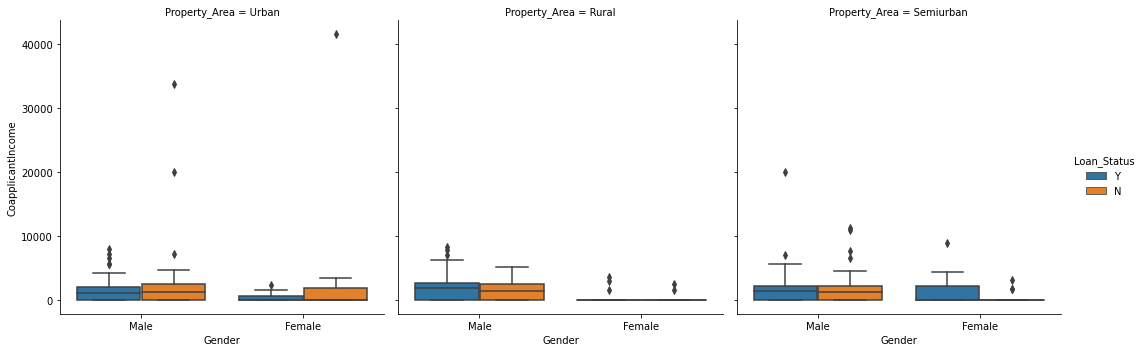

In [32]:
sns.catplot(x="Gender",y="CoapplicantIncome",data=loan,kind="box",hue="Loan_Status",col="Property_Area")

* Observation:- Male have higher Co-applicant income than females in all three property areas

# Bivariate(Categorical Vs Categorical)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

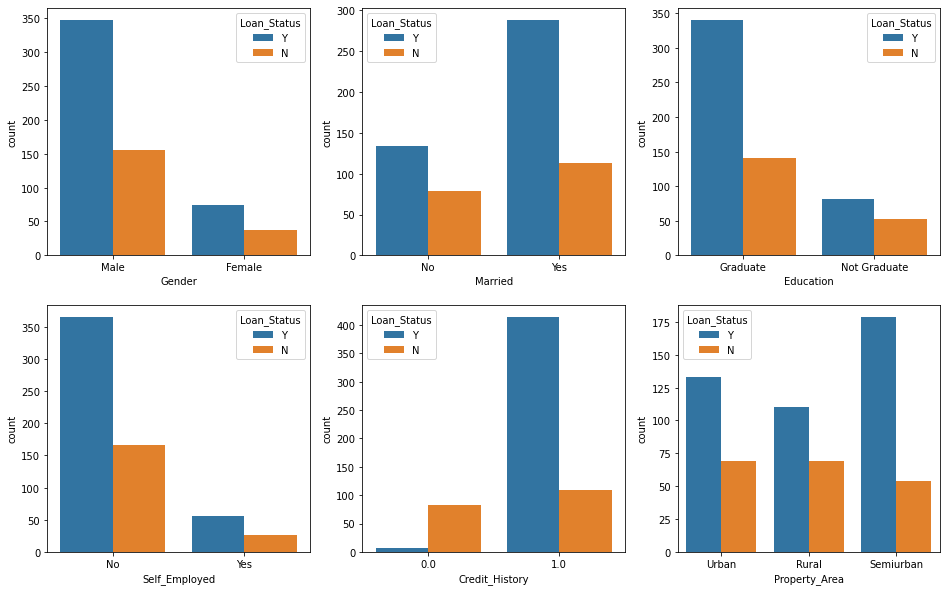

In [33]:
fig,ax=plt.subplots(2,3,figsize=(16,10))
sns.countplot(x='Gender',data=loan,hue="Loan_Status",ax=ax[0,0])
sns.countplot(x='Married',data=loan,hue="Loan_Status",ax=ax[0,1])
sns.countplot(x='Education',data=loan,hue="Loan_Status",ax=ax[0,2])
sns.countplot(x='Self_Employed',data=loan,hue="Loan_Status",ax=ax[1,0])
sns.countplot(x='Credit_History',data=loan,hue="Loan_Status",ax=ax[1,1])
sns.countplot(x='Property_Area',data=loan,hue="Loan_Status",ax=ax[1,2])

* Observations

1) Most of Loans are approved for Male as compair to Female

2) Maximum Loans are approved for Married Applicants

3) Maximum Loans are approved for Graduate Applicants

4) Maximum Loans are approved for Non-Self-employed Applicants

5) Maximum Loans are approved for many applicants whose Credit History is present

6) Maximum Loans approved Semiurban areas rather than Urban and Rural 

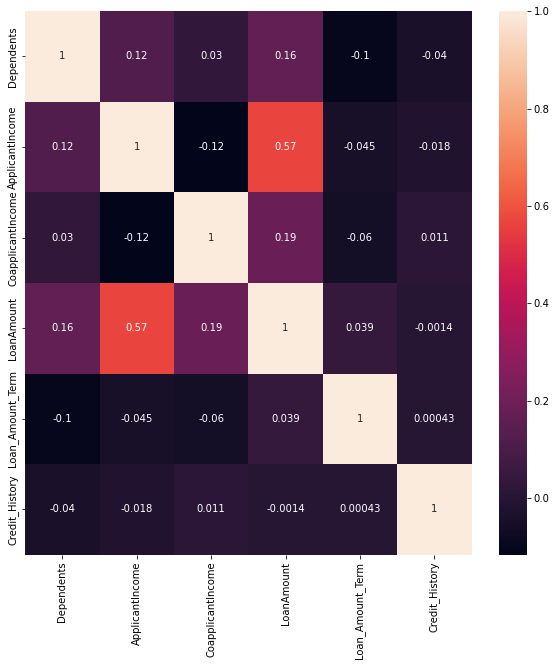

In [34]:
plt.figure(figsize=(10,10))
corr_matrix=loan.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Fit the Machine learning Model

In [35]:
cat = []
con = []
for i in loan.columns:
    if(loan[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [36]:
cat.remove("Loan_ID")
cat.remove("Loan_Status")

In [37]:
cat

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [38]:
con

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [39]:
X = loan[con].join(pd.get_dummies(loan[cat]))

In [40]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000.00000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583.00000,2358.0,120.000000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000.00000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.00000,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3,4106.00000,0.0,40.000000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1,8072.00000,240.0,253.000000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2,7583.00000,0.0,187.000000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [41]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols
model = ols("Credit_History ~ Loan_Status",loan).fit()
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
Q = pd.DataFrame(anova_results)
a = Q['PR(>F)']['Loan_Status']
print("%.40f"%a)

0.0000000000000000000000000000000000000000


In [42]:
# Devide X and Y in training and Testing set
Y = loan[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

<AxesSubplot:>

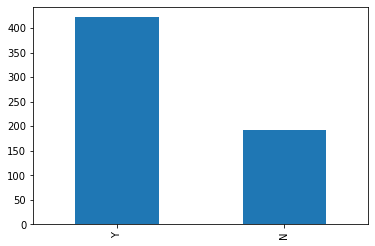

In [43]:
Y['Loan_Status'].value_counts().plot(kind="bar")

<AxesSubplot:>

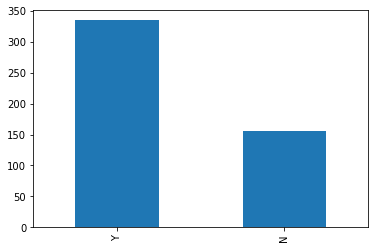

In [44]:
ytrain['Loan_Status'].value_counts().plot(kind="bar")

In [45]:
# fit the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8374


In [46]:
X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [47]:
X = X.drop(labels=['Married_No'],axis=1)
Y = loan[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8374


In [48]:
# Train with entire data on selected algorithm
Y = loan[["Loan_Status"]]
X = loan[con].join(pd.get_dummies(loan[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X,Y)

# Testing with given dataset

In [49]:
test=pd.read_csv("C:\\Users\\Gitanjali\\Desktop\\Shital\\testing_set.csv")

In [50]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [51]:
test.shape

(367, 12)

In [52]:
test['Credit_History']=test['Credit_History'].fillna(1.0)
replacer(test)

dep = []
for i in test.Dependents:
    dep.append(int(i.replace("3+","3")))
test.Dependents=dep

R = test[con].join(pd.get_dummies(test[cat]))

In [53]:
pred = model.predict(R)

In [54]:
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [55]:
OP = test[['Loan_ID']]

In [56]:
OP['predicted_loan_status']=pred

In [57]:
OP.head()

,Loan_ID,predicted_loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [59]:
OP[OP.predicted_loan_status=="Y"].count()

Loan_ID                  302
predicted_loan_status    302
dtype: int64

In [60]:
OP[OP.predicted_loan_status=="N"].count()

Loan_ID                  65
predicted_loan_status    65
dtype: int64

 Result : Out of total 367 Peoples 302 people got approved their loan and remaing 65 are rejected.